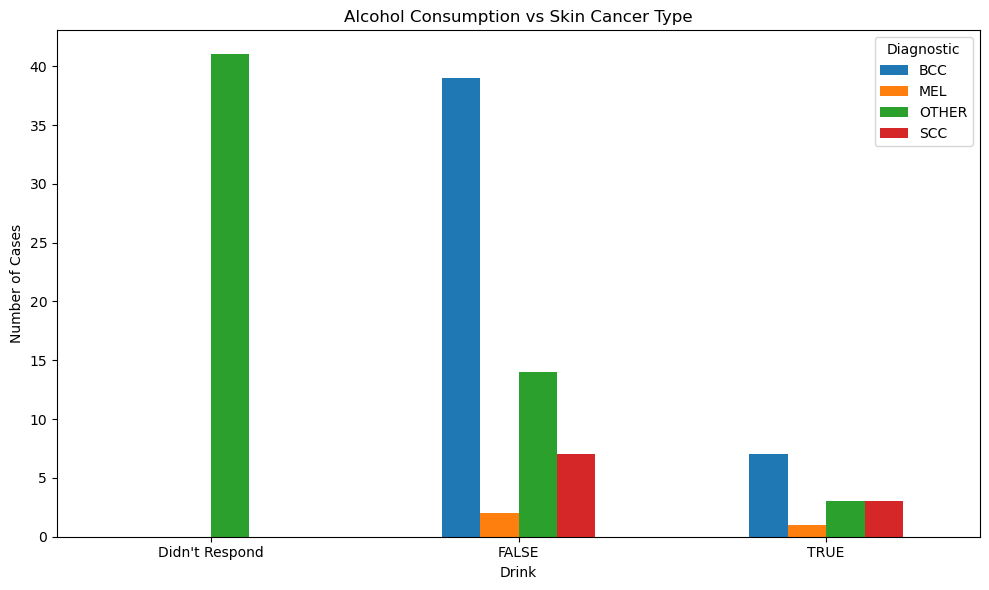

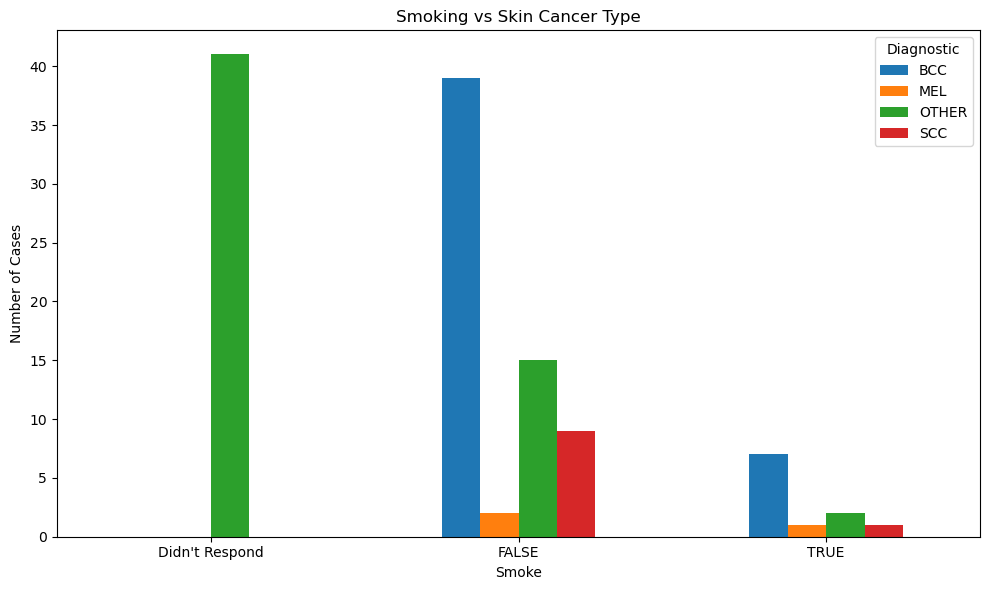

In [ ]:
# Drink and Smoke vs Diagnostic
# NaN values replaced with "Didn't Respond"

import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("metadata_with_group_H_anottated_eduardo.csv", sep=";")
df.columns = df.columns.str.strip()

df["diagnostic"] = df["diagnostic"].astype(str).str.strip().str.upper()

df["drink"] = df["drink"].astype(str).str.strip()
df["smoke"] = df["smoke"].astype(str).str.strip()


df["drink"] = df["drink"].replace(["", "nan", "NaN", "NONE"], pd.NA)
df["smoke"] = df["smoke"].replace(["", "nan", "NaN", "NONE"], pd.NA)

df["drink"] = df["drink"].fillna("Didn't Respond")
df["smoke"] = df["smoke"].fillna("Didn't Respond")

df["drink"] = df["drink"].str.upper().replace("DIDN'T RESPOND", "Didn't Respond")
df["smoke"] = df["smoke"].str.upper().replace("DIDN'T RESPOND", "Didn't Respond")

df["diagnostic_group"] = df["diagnostic"].apply(
    lambda x: x if x in ["BCC", "SCC", "MEL"] else "OTHER"
)

# GRAPH 1: DRINK

drink_counts = (
    df.groupby(["drink", "diagnostic_group"])
      .size()
      .unstack(fill_value=0)
)

drink_counts.plot(kind="bar", figsize=(10, 6))

plt.title("Alcohol Consumption vs Skin Cancer Type")
plt.xlabel("Drink")
plt.ylabel("Number of Cases")
plt.xticks(rotation=0)
plt.legend(title="Diagnostic")
plt.tight_layout()
plt.show()


#SMOKE
smoke_counts = (
    df.groupby(["smoke", "diagnostic_group"])
      .size()
      .unstack(fill_value=0)
)

smoke_counts.plot(kind="bar", figsize=(10, 6))

plt.title("Smoking vs Skin Cancer Type")
plt.xlabel("Smoke")
plt.ylabel("Number of Cases")
plt.xticks(rotation=0)
plt.legend(title="Diagnostic")
plt.tight_layout()
plt.show()





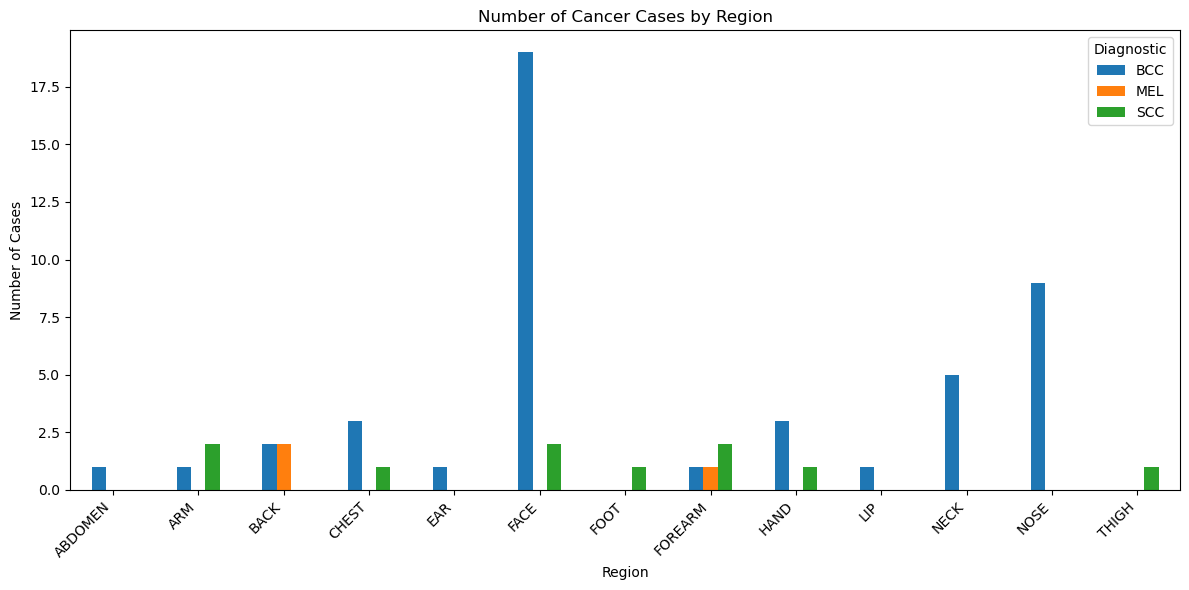

In [ ]:
# Grouping by region

import pandas as pd
import matplotlib.pyplot as plt

# Read CSV
df = pd.read_csv("metadata_with_group_H_anottated_eduardo.csv", sep=";")
df.columns = df.columns.str.strip()

# Clean diagnostic and region columns
df["diagnostic"] = df["diagnostic"].astype(str).str.strip().str.upper()
df["region"] = df["region"].astype(str).str.strip()

# Keep only BCC, SCC and MEL
df_filtered = df[df["diagnostic"].isin(["BCC", "SCC", "MEL"])].copy()

# Group by region and diagnostic
region_counts = (
    df_filtered
    .groupby(["region", "diagnostic"])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

region_counts.plot(kind="bar", figsize=(12, 6))

plt.title("Number of Cancer Cases by Region")
plt.xlabel("Region")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45, ha="right")

plt.legend(title="Diagnostic")
plt.tight_layout()
plt.show()

C:\Users\eduar\AppData\Local\Temp\ipykernel_2424\2493061835.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, labels=diagnostics, patch_artist=True, showfliers=True)


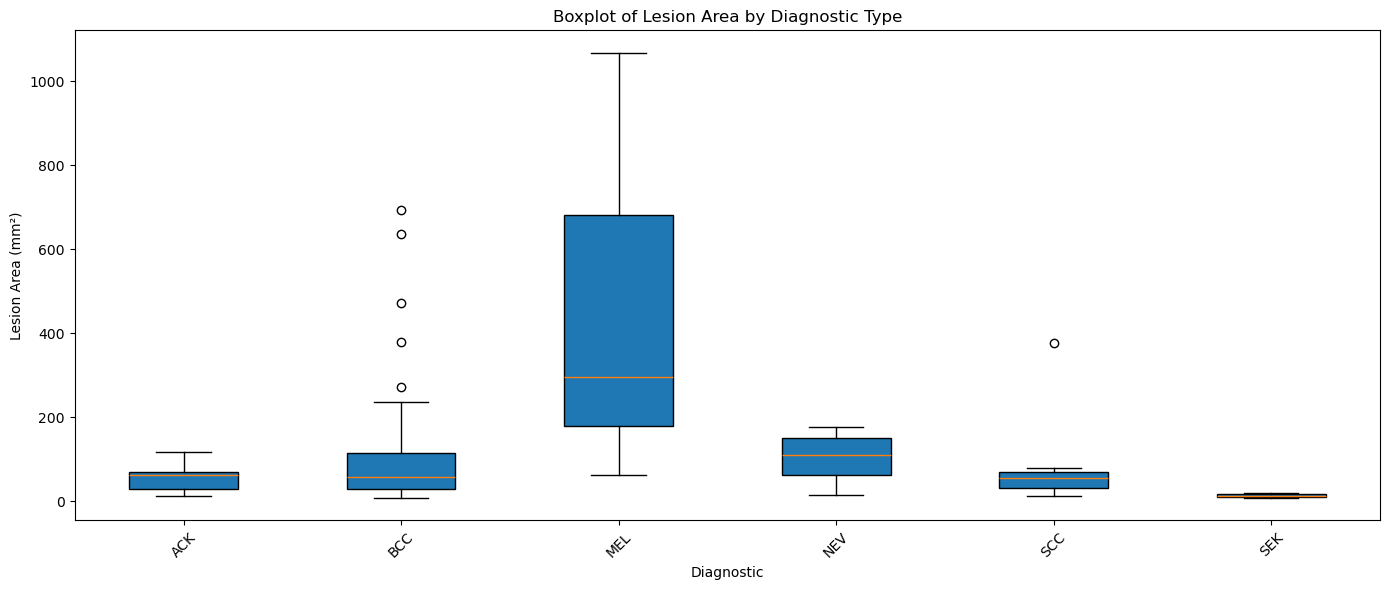

In [ ]:
#Box-plot of areas (assuming eliptical)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("metadata_with_group_H_anottated_eduardo.csv", sep=";")
df.columns = df.columns.str.strip()


df["diagnostic"] = df["diagnostic"].astype(str).str.strip().str.upper()


df["diameter_1"] = pd.to_numeric(df["diameter_1"], errors="coerce")
df["diameter_2"] = pd.to_numeric(df["diameter_2"], errors="coerce")

# Elliptical lesion area (mm²)
df["lesion_area"] = (np.pi / 4) * df["diameter_1"] * df["diameter_2"]

# Remove missing values
df = df.dropna(subset=["lesion_area", "diagnostic"])

diagnostics = sorted(df["diagnostic"].unique())


data = [df[df["diagnostic"] == d]["lesion_area"] for d in diagnostics]

plt.figure(figsize=(14, 6))
box = plt.boxplot(data, labels=diagnostics, patch_artist=True, showfliers=True)

for patch in box['boxes']:
    patch.set_facecolor('#1f77b4')

plt.title("Boxplot of Lesion Area by Diagnostic Type")
plt.xlabel("Diagnostic")
plt.ylabel("Lesion Area (mm²)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
df.columns.values

array(['Group_Number', 'Unnamed: 1', 'patient_id', 'lesion_id', 'smoke',
       'drink', 'background_father', 'background_mother', 'age',
       'pesticide', 'gender', 'skin_cancer_history', 'cancer_history',
       'has_piped_water', 'has_sewage_system', 'fitspatrick', 'region',
       'diameter_1', 'diameter_2', 'diagnostic', 'itch', 'grew', 'hurt',
       'changed', 'bleed', 'elevation', 'img_id', 'biopsed', 'group_id',
       'Hair', 'Pen', 'lesion_area'], dtype=object)

In [ ]:
#code for biggest areas

import pandas as pd
import numpy as np


df = pd.read_csv("metadata_with_group_H_anottated_eduardo.csv", sep=";")
df.columns = df.columns.str.strip()

df["diagnostic"] = df["diagnostic"].astype(str).str.strip().str.upper()
df["img_id"] = df["img_id"].astype(str).str.strip()


df["diameter_1"] = pd.to_numeric(df["diameter_1"], errors="coerce")
df["diameter_2"] = pd.to_numeric(df["diameter_2"], errors="coerce")


df["lesion_area"] = (np.pi / 4) * df["diameter_1"] * df["diameter_2"]   # ellipse area


df_valid = df.dropna(subset=["lesion_area", "diagnostic", "img_id"]).copy()


idx_min = df_valid.groupby("diagnostic")["lesion_area"].idxmin()
idx_max = df_valid.groupby("diagnostic")["lesion_area"].idxmax()

min_rows = df_valid.loc[idx_min, ["diagnostic", "img_id", "lesion_area"]].copy()
max_rows = df_valid.loc[idx_max, ["diagnostic", "img_id", "lesion_area"]].copy()

min_rows["extreme"] = "min"
max_rows["extreme"] = "max"

extremes = (
    pd.concat([min_rows, max_rows], ignore_index=True)
      .sort_values(["diagnostic", "extreme"])
      .reset_index(drop=True)
)

print(extremes)

   diagnostic                img_id  lesion_area extreme
0         ACK  PAT_857_1628_916.png   117.809725     max
1         ACK   PAT_108_162_526.png    11.780972     min
2         BCC   PAT_810_1526_67.png   692.721180     max
3         BCC  PAT_981_1848_906.png     7.068583     min
4         MEL  PAT_754_1429_380.png  1068.141502     max
5         MEL  PAT_115_1138_970.png    62.831853     min
6         NEV  PAT_759_1433_973.png   176.714587     max
7         NEV  PAT_297_4307_924.png    15.707963     min
8         SCC     PAT_56_86_802.png   376.991118     max
9         SCC   PAT_390_790_505.png    12.566371     min
10        SEK  PAT_354_1814_726.png    18.849556     max
11        SEK  PAT_939_1791_329.png     7.068583     min


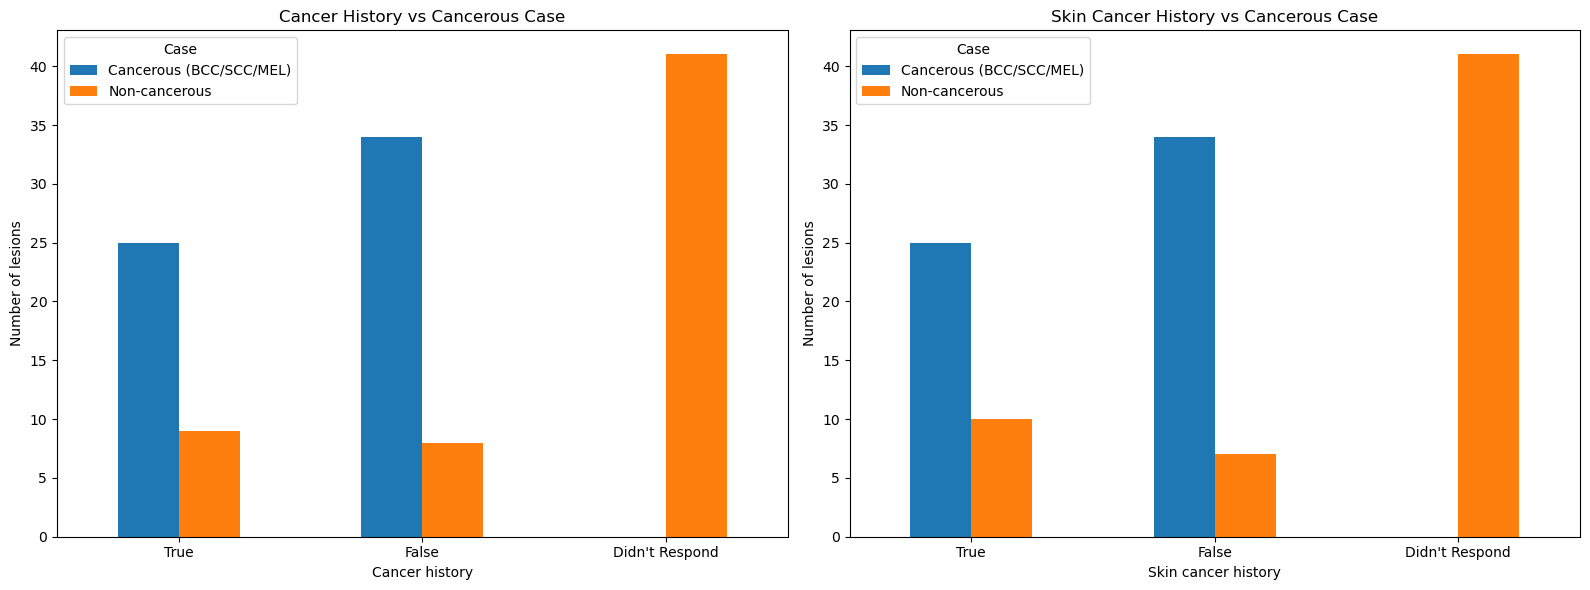

In [ ]:
# Cancer and skin cancer history graphs

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("metadata_with_group_H_anottated_eduardo.csv", sep=";")
df.columns = df.columns.str.strip()

df["diagnostic"] = df["diagnostic"].astype(str).str.strip().str.upper()
cancerous_set = {"BCC", "SCC", "MEL"}
df["cancerous_case"] = df["diagnostic"].isin(cancerous_set)

def to_true_false_missing(x):
    if pd.isna(x):
        return "Didn't Respond"
    if isinstance(x, bool):
        return "True" if x else "False"
    s = str(x).strip().lower()
    if s == "true":
        return "True"
    if s == "false":
        return "False"
    if s == "":
        return "Didn't Respond"
    return "Didn't Respond"

for col in ["cancer_history", "skin_cancer_history"]:
    df[col] = df[col].apply(to_true_false_missing)

order_hist = ["True", "False", "Didn't Respond"]
order_case = [True, False]  # True = cancerous, False = non-cancerous

tab_cancer = (
    df.groupby(["cancer_history", "cancerous_case"])
      .size()
      .unstack(fill_value=0)
      .reindex(index=order_hist, columns=order_case, fill_value=0)
)

tab_skin = (
    df.groupby(["skin_cancer_history", "cancerous_case"])
      .size()
      .unstack(fill_value=0)
      .reindex(index=order_hist, columns=order_case, fill_value=0)
)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

tab_cancer.plot(kind="bar", ax=axes[0])
axes[0].set_title("Cancer History vs Cancerous Case")
axes[0].set_xlabel("Cancer history")
axes[0].set_ylabel("Number of lesions")
axes[0].tick_params(axis="x", rotation=0)
axes[0].legend(["Cancerous (BCC/SCC/MEL)", "Non-cancerous"], title="Case")

tab_skin.plot(kind="bar", ax=axes[1])
axes[1].set_title("Skin Cancer History vs Cancerous Case")
axes[1].set_xlabel("Skin cancer history")
axes[1].set_ylabel("Number of lesions")
axes[1].tick_params(axis="x", rotation=0)
axes[1].legend(["Cancerous (BCC/SCC/MEL)", "Non-cancerous"], title="Case")

plt.tight_layout()
plt.show()